APPLYING NAIVE-BAYES TO AMAZON DATASET
===================

Aim:
====
To apply Naive bayes  to Amazon dataset and obtain Top most imporatant positive and negative words
-------

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

In [7]:
data = pd.read_csv('final_clean.csv')
data.head(2)
#reading preprocessed data using pandas

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleanedText
0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,b'witti littl book make son laugh loud recit c...
1,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",b'grew read sendak book watch realli rosi movi...


In [8]:
df1=data.sort_values('Time', axis=0, ascending=True,
                   inplace=False, kind='quicksort', na_position='last')
df1.head(2)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleanedText
0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,b'witti littl book make son laugh loud recit c...
30,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,b'rememb see show air televis year ago child s...


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364131 entries, 0 to 152780
Data columns (total 11 columns):
Id                        364131 non-null int64
ProductId                 364131 non-null object
UserId                    364131 non-null object
ProfileName               364120 non-null object
HelpfulnessNumerator      364131 non-null int64
HelpfulnessDenominator    364131 non-null int64
Score                     364131 non-null int64
Time                      364131 non-null int64
Summary                   364130 non-null object
Text                      364131 non-null object
cleanedText               364131 non-null object
dtypes: int64(5), object(6)
memory usage: 33.3+ MB


SAMPLING DATA
---------

In [11]:
label=df1['Score']
df = df1.drop("Score",axis=1)
label.head(5)


0      1
30     1
424    1
330    1
423    1
Name: Score, dtype: int64

In [0]:
X = df['cleanedText']
Y = df1['Score']

In [0]:
from sklearn import cross_validation
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.3, random_state=0)
#   Indorder to do Cross validation we are splitting the dataset into two parts 
#i.e) 70% of entire data is TRAININGDATA and 30 % is TESTDATA 

   Indorder to do Cross validation we are splitting the dataset into two parts i.e) 70% of entire data is TRAININGDATA and 30 % is TESTDATA 
  --------

TFIDF FEATURIZATION FOR MULTINOMIAL NAIVE BAYES
-------------

In [0]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
train_features = tf_idf_vect.fit_transform(X_train)#train data featurization
test_features = tf_idf_vect.transform(X_test)#test data featurization

Grid search is used for hyperparameter tuning.
------------

In [20]:
values = [{'alpha': [10**-4,10**-3, 10**-2,10,10**2,10**3,10**4]}]
model = GridSearchCV(MultinomialNB(),values, scoring = 'accuracy', cv=10)# using grid search cv with 10 fold cross validation
model.fit(train_features, Y_train)
print('Best alpha using tfidf',model.best_estimator_)#obtaining best alpha 


Best alpha using tfidf MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)


Accuracy on training set is: 99.62689934128706
Accuracy on test set is: 90.44123031856462
F1_scoreon test set is: 89.11883183548632
Precision on test set is: 90.24984295489025
Recall on test set is: 90.44123031856462
<==========confusion matrix=========>


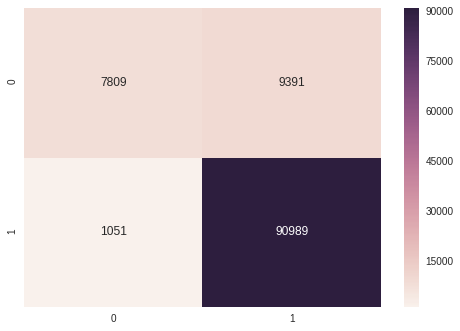

In [21]:
NB = MultinomialNB(alpha=0.01)
NB.fit(train_features,Y_train)#fitting naive bayes to traindata
pred = NB.predict(test_features)#predicting testdata labels
predict=NB.predict(train_features)
#calculating various performance metrics using predicted vs actual labels

f1score = f1_score(Y_test,pred,average='weighted')
precision = precision_score(Y_test,pred,average='weighted')
recall = recall_score(Y_test,pred,average='weighted')
confusion = confusion_matrix(Y_test,pred)
accuracy = accuracy_score(Y_test,pred)
acc=accuracy_score(Y_train,predict)


#printing obtained performance metrics
print('Accuracy on training set is:',acc*100)
print('Accuracy on test set is:',accuracy*100)
print('F1_scoreon test set is:',f1score*100)
print('Precision on test set is:',precision*100)
print('Recall on test set is:',recall*100)
print('<==========confusion matrix=========>')
p= sns.heatmap(confusion, annot=True, fmt="d")


EXTRACTING TOP-MOST POSITIVE AND NEGATIVE WORDS
--------------------

In [22]:
features = tf_idf_vect.get_feature_names()
feat = np.array(features)
feat_negative = np.vstack((np.absolute(NB.feature_log_prob_[0]),feat))
feat_positive = np.vstack((np.absolute(NB.feature_log_prob_[1]),feat))

#using log probabitity to extract negative words
feat_neg = pd.DataFrame(data=feat_negative.T,columns=('COEFFICIENTS','WORDS'))
neg_features = feat_neg.sort_values('COEFFICIENTS',axis=0,ascending=False,inplace=False,kind='quicksort')
feat_pos = pd.DataFrame(data=feat_positive.T,columns=('COEFFICIENTS','WORDS'))
pos_features = feat_pos.sort_values('COEFFICIENTS',axis=0,ascending=False,inplace=False,kind='quicksort')

#to extract top most important features by sorting them 
print(' *****Top 10 negative features*****')
print(neg_features[0:10])
print('<=======================================================================================>')
print(' *****Top 10 positive features*****')
print(pos_features[0:10])


 *****Top 10 negative features*****
              COEFFICIENTS      WORDS
2310160   9.99987531458793    xylitol
404433    9.99843966322608       coke
828527    9.99836031136299     frozen
1028647  9.996677298878515       inde
1670291  9.996257347385093  refus eat
1073574   9.99595233440079     jasmin
748405    9.99508586097446  felt like
856154   9.994431248473239    get pay
2110555  9.994334374402436        ton
1181295  9.994215654421174      liver
<=======================================================================================>
 *****Top 10 positive features*****
              COEFFICIENTS          WORDS
1161325  9.999231942110876       like lot
493885   9.998807581295921          crumb
1482289   9.99837284930499           pear
1606355    9.9982420372746            pup
1763887  9.997555831220703          scalp
119487   9.997485079314224   avail amazon
1957148  9.997371883427716   store bought
2042823  9.996025383367389        tea ive
1507128  9.996003375762818          pickl


THESE ARE THE TOPMOST NEGATIVE WORDS
-------------



THESE ARE THE TOPMOST POSITIVE WORDS

**BAG OF WORDS **
============

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer() #in scikit-learn
train_BOW = count_vect.fit_transform(X_train)
test_BOW = count_vect.transform(X_test)


In [18]:
parameters = [{'alpha': [10**-4,10**-3, 10**-2,10,10**2,10**3,10**4]}]
model_bow = GridSearchCV(MultinomialNB(),parameters, scoring = 'accuracy', cv=10)# using grid search cv with 10 fold cross validation
model_bow.fit(train_BOW, Y_train)
print('Best alpha using tfidf',model_bow.best_estimator_)#obtaining best alpha 


Best alpha using tfidf MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)


Accuracy on training set is: 91.77609252582477
Accuracy on test set is: 89.91120468692787
F1_scoreon test set is: 89.95503980533063
Precision on test set is: 90.00197410908211
Recall on test set is: 89.91120468692787
<==========confusion matrix=========>
Accuracy  89.91120468692787
F1_score 0.8995503980533063
Precision 0.9000197410908212
Recall 0.8991120468692787
<================CONFUSION MATRIX================>


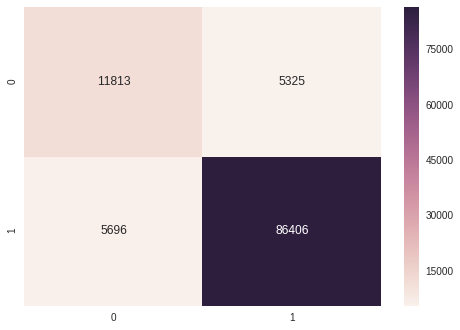

In [20]:
NB_bow = MultinomialNB(alpha=0.01)
NB_bow.fit(train_BOW,Y_train)
predict=NB_bow.predict(train_BOW)
pred = NB_bow.predict(test_BOW)
f1score = f1_score(Y_test,pred,average='weighted')
precision = precision_score(Y_test,pred,average='weighted')
recall = recall_score(Y_test,pred,average='weighted')
confusion = confusion_matrix(Y_test,pred)
accuracy = accuracy_score(Y_test,pred)
acc=accuracy_score(Y_train,predict)


#printing obtained performance metrics
print('Accuracy on training set is:',acc*100)
print('Accuracy on test set is:',accuracy*100)
print('F1_score on test set is:',f1score*100)
print('Precision on test set is:',precision*100)
print('Recall on test set is:',recall*100)
print('<==========confusion matrix=========>')

f1score = f1_score(Y_test,pred,average='weighted')
precision = precision_score(Y_test,pred,average='weighted')
recall = recall_score(Y_test,pred,average='weighted')
con_matrix = confusion_matrix(Y_test,pred)
acc = accuracy_score(Y_test,pred)
print('Accuracy ',acc*100)
print('F1_score',f1score)
print('Precision',precision)
print('Recall',recall)
print('<================CONFUSION MATRIX================>')
P= sns.heatmap(con_matrix, annot=True, fmt="d")



In [38]:
features = count_vect.get_feature_names()
feat = np.array(features)
feat_negative = np.vstack((np.absolute(NB_bow.feature_log_prob_[0]),feat))
feat_positive = np.vstack((np.absolute(NB_bow.feature_log_prob_[1]),feat))

#using log probabitity to extract negative words
feat_neg = pd.DataFrame(data=feat_negative.T,columns=('COEFFICIENTS','WORDS'))
neg_features = feat_neg.sort_values('COEFFICIENTS',axis=0,ascending=False,inplace=False,kind='quicksort')
feat_pos = pd.DataFrame(data=feat_positive.T,columns=('COEFFICIENTS','WORDS'))
pos_features = feat_pos.sort_values('COEFFICIENTS',axis=0,ascending=False,inplace=False,kind='quicksort')

#to extract top most important features by sorting them 
print(' *****Top 10 negative features*****')
print(neg_features[0:10])
print('<=======================================================================================>')
print(' *****Top 10 positive features*****')

print(pos_features[0:10])


 *****Top 10 negative features*****
            COEFFICIENTS     WORDS
30383  9.995748396828104   lobster
13894  9.995748396828104    deodor
17333  9.995748396828104     escap
43782  9.995748396828104     rescu
3843   9.995748396828104    bakeri
54743  9.995748396828104   unappet
28531  9.995748396828104      kiwi
27713  9.995748396828104       jug
8384   9.995748396828104  categori
6822   9.995748396828104       btw
<=======================================================================================>
 *****Top 10 positive features*****
            COEFFICIENTS    WORDS
46591  9.997548655840019    seven
9305   9.997548655840019  chicori
56408  9.994849671718017   versus
47684  9.994849671718017  skillet
14647  9.992157952507823    dirti
48879  9.992157952507823    spare
36030  9.992157952507823     nurs
14102  9.989473459204174   detect
25498  9.989473459204174      iam
5556   9.989473459204174    bless


Summary
=======

1. Apply text featurization ,here tf-idf featurization is used to convert text to numerical vector.     

2. Apply naive-bayes and obtain various performance measures .    
 
2.  Extract top most important positive and negative words



In [0]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Featurization","TFIDF","BOW"	]
x.add_row(["Optimal Alpha by Grid-search", 0.01, 0.01])
x.add_row(["Train Accuracy for K obtained above ", 99.6, 91.77])
x.add_row(["Test Accuracy", 90.44, 89.91])



In [22]:
print(x)

+--------------------------------------+-------+-------+
|            Featurization             | TFIDF |  BOW  |
+--------------------------------------+-------+-------+
|     Optimal Alpha by Grid-search     |  0.01 |  0.01 |
| Train Accuracy for K obtained above  |  99.6 | 91.77 |
|            Test Accuracy             | 90.44 | 89.91 |
+--------------------------------------+-------+-------+
